In [1]:
#Cargar Librerías
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
import csv
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('fast')

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Cargar archivo .CSV con datos de delitos
#Si es necesario, aún no se puede agregar más variables

df = pd.read_csv("/Users/j.artigasalegra/Documents/tesis/Solicitud_Base_Datos/Base_Dato_Con_Coorednadas/DATOS GEOCODIFICADOS/DATOS_2014_RED.csv",  parse_dates=[0], index_col=0, names=['Delito', 'DiaSem', 'Mes', 'Hora', 'TipoV', 'Longitud', 'Latitud'])
df

,DiaSem,Mes,Hora,TipoV,Longitud,Latitud
Delito,,,,,,
1,3,1,1,2,-71.364279,-33.066009
2,3,1,4,1,-71.449283,-32.506328
3,3,1,5,1,-71.244152,-32.885247
4,3,1,5,4,-71.544414,-32.958467
5,3,1,6,1,-71.607311,-33.564088
6,3,1,8,1,-71.546929,-33.022157
7,3,1,9,3,-71.586060,-33.033630
8,3,1,11,5,-71.334306,-33.152032
9,3,1,13,1,-71.578250,-33.030275


In [3]:
df.describe()

,DiaSem,Mes,Hora,TipoV,Longitud,Latitud
count,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000,2440.000000
mean,3.956557,6.169262,12.381148,2.061885,-71.612225,-32.998425
std,1.972483,3.378725,7.380413,1.604838,2.668238,0.460287
min,1.000000,1.000000,0.000000,1.000000,-109.436278,-33.921019
25%,2.000000,3.000000,6.000000,1.000000,-71.559836,-33.049016
50%,4.000000,6.000000,12.000000,1.000000,-71.518119,-33.028333
75%,6.000000,9.000000,20.000000,3.000000,-71.395749,-32.975777
max,7.000000,12.000000,23.000000,6.000000,-70.182509,-27.073739


In [4]:
# convertir series a aprendizaje supervizado
#Aprendizaje supervisado será utilizando los 15 días previos para predecir el actual delito (latitud y longitud)

def series_to_supervised(data, n_in=1, n_out=2, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [5]:
#Normalizar datos de variable "Dia de la semana"
PASOS=15

# load dataset
values = df['DiaSem'].values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
DiaSemN = scaler.fit_transform(values)

df['DiaSemN'] = DiaSemN
scaledMerge=df.drop(columns=['DiaSem'])
print(scaledMerge)

# frame as supervised learning
reframed = series_to_supervised(scaledMerge, PASOS, 1)
reframed.head()

        Mes  Hora  TipoV   Longitud    Latitud   DiaSemN
Delito                                                  
1         1     1      2 -71.364279 -33.066009  0.333333
2         1     4      1 -71.449283 -32.506328  0.333333
3         1     5      1 -71.244152 -32.885247  0.333333
4         1     5      4 -71.544414 -32.958467  0.333333
5         1     6      1 -71.607311 -33.564088  0.333333
6         1     8      1 -71.546929 -33.022157  0.333333
7         1     9      3 -71.586060 -33.033630  0.333333
8         1    11      5 -71.334306 -33.152032  0.333333
9         1    13      1 -71.578250 -33.030275  0.333333
10        1    22      2 -71.518253 -33.036472  0.333333
11        1     0      1 -71.605127 -33.548376  0.500000
12        1     2      1 -71.599784 -33.539632  0.666667
13        1     4      1 -71.526981 -32.987312  0.666667
14        1    10      2 -71.534616 -32.979286  0.666667
15        1    10      1 -71.562452 -33.020004  0.666667
16        1    18      1 -71.54

,var1(t-15),var2(t-15),var3(t-15),var4(t-15),var5(t-15),var6(t-15),var1(t-14),var2(t-14),var3(t-14),var4(t-14),...,var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
Delito,,,,,,,,,,,,,,,,,,,,,
16,1.0,1.0,2.0,-71.364279,-33.066009,0.333333,1.0,4.0,1.0,-71.449283,...,1.0,-71.562452,-33.020004,0.666667,1,18,1,-71.546292,-32.932899,0.666667
17,1.0,4.0,1.0,-71.449283,-32.506328,0.333333,1.0,5.0,1.0,-71.244152,...,1.0,-71.546292,-32.932899,0.666667,1,18,1,-71.244152,-32.885247,0.666667
18,1.0,5.0,1.0,-71.244152,-32.885247,0.333333,1.0,5.0,4.0,-71.544414,...,1.0,-71.244152,-32.885247,0.666667,1,21,1,-71.552552,-33.014981,0.666667
19,1.0,5.0,4.0,-71.544414,-32.958467,0.333333,1.0,6.0,1.0,-71.607311,...,1.0,-71.552552,-33.014981,0.666667,1,22,1,-71.605043,-33.553662,0.666667
20,1.0,6.0,1.0,-71.607311,-33.564088,0.333333,1.0,8.0,1.0,-71.546929,...,1.0,-71.605043,-33.553662,0.666667,1,22,6,-71.476582,-32.997061,0.666667


In [6]:
#Normalizar datos de variable "Mes del delito"
PASOS=15

# load dataset
values2 = df['Mes'].values

# ensure all data is float
values2 = values2.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
values2=values2.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
MesN = scaler.fit_transform(values2)

df['MesN'] = MesN
scaledMerge2=df.drop(columns=['DiaSem','Mes'])
print(scaledMerge2)

# frame as supervised learning
reframed = series_to_supervised(scaledMerge2, PASOS, 1)
reframed.head()

        Hora  TipoV   Longitud    Latitud   DiaSemN  MesN
Delito                                                   
1          1      2 -71.364279 -33.066009  0.333333   0.0
2          4      1 -71.449283 -32.506328  0.333333   0.0
3          5      1 -71.244152 -32.885247  0.333333   0.0
4          5      4 -71.544414 -32.958467  0.333333   0.0
5          6      1 -71.607311 -33.564088  0.333333   0.0
6          8      1 -71.546929 -33.022157  0.333333   0.0
7          9      3 -71.586060 -33.033630  0.333333   0.0
8         11      5 -71.334306 -33.152032  0.333333   0.0
9         13      1 -71.578250 -33.030275  0.333333   0.0
10        22      2 -71.518253 -33.036472  0.333333   0.0
11         0      1 -71.605127 -33.548376  0.500000   0.0
12         2      1 -71.599784 -33.539632  0.666667   0.0
13         4      1 -71.526981 -32.987312  0.666667   0.0
14        10      2 -71.534616 -32.979286  0.666667   0.0
15        10      1 -71.562452 -33.020004  0.666667   0.0
16        18  

,var1(t-15),var2(t-15),var3(t-15),var4(t-15),var5(t-15),var6(t-15),var1(t-14),var2(t-14),var3(t-14),var4(t-14),...,var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
Delito,,,,,,,,,,,,,,,,,,,,,
16,1.0,2.0,-71.364279,-33.066009,0.333333,0.0,4.0,1.0,-71.449283,-32.506328,...,-71.562452,-33.020004,0.666667,0.0,18,1,-71.546292,-32.932899,0.666667,0.0
17,4.0,1.0,-71.449283,-32.506328,0.333333,0.0,5.0,1.0,-71.244152,-32.885247,...,-71.546292,-32.932899,0.666667,0.0,18,1,-71.244152,-32.885247,0.666667,0.0
18,5.0,1.0,-71.244152,-32.885247,0.333333,0.0,5.0,4.0,-71.544414,-32.958467,...,-71.244152,-32.885247,0.666667,0.0,21,1,-71.552552,-33.014981,0.666667,0.0
19,5.0,4.0,-71.544414,-32.958467,0.333333,0.0,6.0,1.0,-71.607311,-33.564088,...,-71.552552,-33.014981,0.666667,0.0,22,1,-71.605043,-33.553662,0.666667,0.0
20,6.0,1.0,-71.607311,-33.564088,0.333333,0.0,8.0,1.0,-71.546929,-33.022157,...,-71.605043,-33.553662,0.666667,0.0,22,6,-71.476582,-32.997061,0.666667,0.0


In [7]:
#Normalizar datos de variable "Hora del delito"
PASOS=15

# load dataset
values3 = df['Hora'].values

# ensure all data is float
values3 = values3.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
values3=values3.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
HoraN = scaler.fit_transform(values3)

df['HoraN'] = HoraN
scaledMerge3=df.drop(columns=['DiaSem','Mes', 'Hora'])
print(scaledMerge3)

# frame as supervised learning
reframed = series_to_supervised(scaledMerge3, PASOS, 1)
reframed.head()

        TipoV   Longitud    Latitud   DiaSemN  MesN     HoraN
Delito                                                       
1           2 -71.364279 -33.066009  0.333333   0.0  0.043478
2           1 -71.449283 -32.506328  0.333333   0.0  0.173913
3           1 -71.244152 -32.885247  0.333333   0.0  0.217391
4           4 -71.544414 -32.958467  0.333333   0.0  0.217391
5           1 -71.607311 -33.564088  0.333333   0.0  0.260870
6           1 -71.546929 -33.022157  0.333333   0.0  0.347826
7           3 -71.586060 -33.033630  0.333333   0.0  0.391304
8           5 -71.334306 -33.152032  0.333333   0.0  0.478261
9           1 -71.578250 -33.030275  0.333333   0.0  0.565217
10          2 -71.518253 -33.036472  0.333333   0.0  0.956522
11          1 -71.605127 -33.548376  0.500000   0.0  0.000000
12          1 -71.599784 -33.539632  0.666667   0.0  0.086957
13          1 -71.526981 -32.987312  0.666667   0.0  0.173913
14          2 -71.534616 -32.979286  0.666667   0.0  0.434783
15      

,var1(t-15),var2(t-15),var3(t-15),var4(t-15),var5(t-15),var6(t-15),var1(t-14),var2(t-14),var3(t-14),var4(t-14),...,var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
Delito,,,,,,,,,,,,,,,,,,,,,
16,2.0,-71.364279,-33.066009,0.333333,0.0,0.043478,1.0,-71.449283,-32.506328,0.333333,...,-33.020004,0.666667,0.0,0.434783,1,-71.546292,-32.932899,0.666667,0.0,0.782609
17,1.0,-71.449283,-32.506328,0.333333,0.0,0.173913,1.0,-71.244152,-32.885247,0.333333,...,-32.932899,0.666667,0.0,0.782609,1,-71.244152,-32.885247,0.666667,0.0,0.782609
18,1.0,-71.244152,-32.885247,0.333333,0.0,0.217391,4.0,-71.544414,-32.958467,0.333333,...,-32.885247,0.666667,0.0,0.782609,1,-71.552552,-33.014981,0.666667,0.0,0.913043
19,4.0,-71.544414,-32.958467,0.333333,0.0,0.217391,1.0,-71.607311,-33.564088,0.333333,...,-33.014981,0.666667,0.0,0.913043,1,-71.605043,-33.553662,0.666667,0.0,0.956522
20,1.0,-71.607311,-33.564088,0.333333,0.0,0.260870,1.0,-71.546929,-33.022157,0.333333,...,-33.553662,0.666667,0.0,0.956522,6,-71.476582,-32.997061,0.666667,0.0,0.956522


In [8]:
#Normalizar datos de variable "Tipo vehiculo robado"
PASOS=15

# load dataset
values4 = df['TipoV'].values

# ensure all data is float
values4 = values4.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
values4=values4.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
TipoVN = scaler.fit_transform(values4)

df['TipoVN'] = TipoVN
scaledMerge4=df.drop(columns=['DiaSem','Mes', 'Hora','TipoV'])
print(scaledMerge4)

# frame as supervised learning
reframed = series_to_supervised(scaledMerge4, PASOS, 1)
reframed.head()

         Longitud    Latitud   DiaSemN  MesN     HoraN  TipoVN
Delito                                                        
1      -71.364279 -33.066009  0.333333   0.0  0.043478     0.2
2      -71.449283 -32.506328  0.333333   0.0  0.173913     0.0
3      -71.244152 -32.885247  0.333333   0.0  0.217391     0.0
4      -71.544414 -32.958467  0.333333   0.0  0.217391     0.6
5      -71.607311 -33.564088  0.333333   0.0  0.260870     0.0
6      -71.546929 -33.022157  0.333333   0.0  0.347826     0.0
7      -71.586060 -33.033630  0.333333   0.0  0.391304     0.4
8      -71.334306 -33.152032  0.333333   0.0  0.478261     0.8
9      -71.578250 -33.030275  0.333333   0.0  0.565217     0.0
10     -71.518253 -33.036472  0.333333   0.0  0.956522     0.2
11     -71.605127 -33.548376  0.500000   0.0  0.000000     0.0
12     -71.599784 -33.539632  0.666667   0.0  0.086957     0.0
13     -71.526981 -32.987312  0.666667   0.0  0.173913     0.0
14     -71.534616 -32.979286  0.666667   0.0  0.434783 

,var1(t-15),var2(t-15),var3(t-15),var4(t-15),var5(t-15),var6(t-15),var1(t-14),var2(t-14),var3(t-14),var4(t-14),...,var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
Delito,,,,,,,,,,,,,,,,,,,,,
16,-71.364279,-33.066009,0.333333,0.0,0.043478,0.2,-71.449283,-32.506328,0.333333,0.0,...,0.666667,0.0,0.434783,0.0,-71.546292,-32.932899,0.666667,0.0,0.782609,0.0
17,-71.449283,-32.506328,0.333333,0.0,0.173913,0.0,-71.244152,-32.885247,0.333333,0.0,...,0.666667,0.0,0.782609,0.0,-71.244152,-32.885247,0.666667,0.0,0.782609,0.0
18,-71.244152,-32.885247,0.333333,0.0,0.217391,0.0,-71.544414,-32.958467,0.333333,0.0,...,0.666667,0.0,0.782609,0.0,-71.552552,-33.014981,0.666667,0.0,0.913043,0.0
19,-71.544414,-32.958467,0.333333,0.0,0.217391,0.6,-71.607311,-33.564088,0.333333,0.0,...,0.666667,0.0,0.913043,0.0,-71.605043,-33.553662,0.666667,0.0,0.956522,0.0
20,-71.607311,-33.564088,0.333333,0.0,0.260870,0.0,-71.546929,-33.022157,0.333333,0.0,...,0.666667,0.0,0.956522,0.0,-71.476582,-32.997061,0.666667,0.0,0.956522,1.0


In [9]:
#Normalizar datos de variable "Longitud del delito"
PASOS=15

# load dataset
values5 = df['Longitud'].values

# ensure all data is float
values5 = values5.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
values5=values5.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
LongitudN = scaler.fit_transform(values5)

df['LongitudN'] = LongitudN
scaledMerge5=df.drop(columns=['DiaSem','Mes','Hora', 'TipoV','Longitud'])
print(scaledMerge5)

# frame as supervised learning
reframed = series_to_supervised(scaledMerge5, PASOS, 1)
reframed.head()

          Latitud   DiaSemN  MesN     HoraN  TipoVN  LongitudN
Delito                                                        
1      -33.066009  0.333333   0.0  0.043478     0.2   0.969894
2      -32.506328  0.333333   0.0  0.173913     0.0   0.967729
3      -32.885247  0.333333   0.0  0.217391     0.0   0.972954
4      -32.958467  0.333333   0.0  0.217391     0.6   0.965305
5      -33.564088  0.333333   0.0  0.260870     0.0   0.963703
6      -33.022157  0.333333   0.0  0.347826     0.0   0.965241
7      -33.033630  0.333333   0.0  0.391304     0.4   0.964244
8      -33.152032  0.333333   0.0  0.478261     0.8   0.970658
9      -33.030275  0.333333   0.0  0.565217     0.0   0.964443
10     -33.036472  0.333333   0.0  0.956522     0.2   0.965972
11     -33.548376  0.500000   0.0  0.000000     0.0   0.963758
12     -33.539632  0.666667   0.0  0.086957     0.0   0.963894
13     -32.987312  0.666667   0.0  0.173913     0.0   0.965749
14     -32.979286  0.666667   0.0  0.434783     0.2   0

,var1(t-15),var2(t-15),var3(t-15),var4(t-15),var5(t-15),var6(t-15),var1(t-14),var2(t-14),var3(t-14),var4(t-14),...,var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
Delito,,,,,,,,,,,,,,,,,,,,,
16,-33.066009,0.333333,0.0,0.043478,0.2,0.969894,-32.506328,0.333333,0.0,0.173913,...,0.0,0.434783,0.0,0.964846,-32.932899,0.666667,0.0,0.782609,0.0,0.965257
17,-32.506328,0.333333,0.0,0.173913,0.0,0.967729,-32.885247,0.333333,0.0,0.217391,...,0.0,0.782609,0.0,0.965257,-32.885247,0.666667,0.0,0.782609,0.0,0.972954
18,-32.885247,0.333333,0.0,0.217391,0.0,0.972954,-32.958467,0.333333,0.0,0.217391,...,0.0,0.782609,0.0,0.972954,-33.014981,0.666667,0.0,0.913043,0.0,0.965098
19,-32.958467,0.333333,0.0,0.217391,0.6,0.965305,-33.564088,0.333333,0.0,0.260870,...,0.0,0.913043,0.0,0.965098,-33.553662,0.666667,0.0,0.956522,0.0,0.963761
20,-33.564088,0.333333,0.0,0.260870,0.0,0.963703,-33.022157,0.333333,0.0,0.347826,...,0.0,0.956522,0.0,0.963761,-32.997061,0.666667,0.0,0.956522,1.0,0.967033


In [10]:
#Normalizar datos de variable "Latitud del delito"
PASOS=15

# load dataset
values6 = df['Latitud'].values

# ensure all data is float
values6 = values6.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
values6=values6.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
LatitudN = scaler.fit_transform(values6)

df['LatitudN'] = LatitudN
scaledMerge6=df.drop(columns=['DiaSem','Mes','Hora', 'TipoV','Longitud', 'Latitud'])
print(scaledMerge6)

# frame as supervised learning
reframed = series_to_supervised(scaledMerge6, PASOS, 1)
reframed.head()

         DiaSemN  MesN     HoraN  TipoVN  LongitudN  LatitudN
Delito                                                       
1       0.333333   0.0  0.043478     0.2   0.969894  0.124869
2       0.333333   0.0  0.173913     0.0   0.967729  0.206606
3       0.333333   0.0  0.217391     0.0   0.972954  0.151268
4       0.333333   0.0  0.217391     0.6   0.965305  0.140575
5       0.333333   0.0  0.260870     0.0   0.963703  0.052128
6       0.333333   0.0  0.347826     0.0   0.965241  0.131273
7       0.333333   0.0  0.391304     0.4   0.964244  0.129598
8       0.333333   0.0  0.478261     0.8   0.970658  0.112306
9       0.333333   0.0  0.565217     0.0   0.964443  0.130088
10      0.333333   0.0  0.956522     0.2   0.965972  0.129182
11      0.500000   0.0  0.000000     0.0   0.963758  0.054423
12      0.666667   0.0  0.086957     0.0   0.963894  0.055699
13      0.666667   0.0  0.173913     0.0   0.965749  0.136362
14      0.666667   0.0  0.434783     0.2   0.965555  0.137534
15      

,var1(t-15),var2(t-15),var3(t-15),var4(t-15),var5(t-15),var6(t-15),var1(t-14),var2(t-14),var3(t-14),var4(t-14),...,var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
Delito,,,,,,,,,,,,,,,,,,,,,
16,0.333333,0.0,0.043478,0.2,0.969894,0.124869,0.333333,0.0,0.173913,0.0,...,0.434783,0.0,0.964846,0.131588,0.666667,0.0,0.782609,0.0,0.965257,0.144309
17,0.333333,0.0,0.173913,0.0,0.967729,0.206606,0.333333,0.0,0.217391,0.0,...,0.782609,0.0,0.965257,0.144309,0.666667,0.0,0.782609,0.0,0.972954,0.151268
18,0.333333,0.0,0.217391,0.0,0.972954,0.151268,0.333333,0.0,0.217391,0.6,...,0.782609,0.0,0.972954,0.151268,0.666667,0.0,0.913043,0.0,0.965098,0.132321
19,0.333333,0.0,0.217391,0.6,0.965305,0.140575,0.333333,0.0,0.260870,0.0,...,0.913043,0.0,0.965098,0.132321,0.666667,0.0,0.956522,0.0,0.963761,0.053650
20,0.333333,0.0,0.260870,0.0,0.963703,0.052128,0.333333,0.0,0.347826,0.0,...,0.956522,0.0,0.963761,0.053650,0.666667,0.0,0.956522,1.0,0.967033,0.134938


In [11]:
#Se elimina las otras variables en perido t para solo tener como salida Longitud y Latitud

newReframed=reframed.drop(columns=['var1(t)','var2(t)','var3(t)','var4(t)'])
print(newReframed.shape)
newReframed.head()

(2425, 92)


,var1(t-15),var2(t-15),var3(t-15),var4(t-15),var5(t-15),var6(t-15),var1(t-14),var2(t-14),var3(t-14),var4(t-14),...,var5(t-2),var6(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var5(t),var6(t)
Delito,,,,,,,,,,,,,,,,,,,,,
16,0.333333,0.0,0.043478,0.2,0.969894,0.124869,0.333333,0.0,0.173913,0.0,...,0.965555,0.137534,0.666667,0.0,0.434783,0.0,0.964846,0.131588,0.965257,0.144309
17,0.333333,0.0,0.173913,0.0,0.967729,0.206606,0.333333,0.0,0.217391,0.0,...,0.964846,0.131588,0.666667,0.0,0.782609,0.0,0.965257,0.144309,0.972954,0.151268
18,0.333333,0.0,0.217391,0.0,0.972954,0.151268,0.333333,0.0,0.217391,0.6,...,0.965257,0.144309,0.666667,0.0,0.782609,0.0,0.972954,0.151268,0.965098,0.132321
19,0.333333,0.0,0.217391,0.6,0.965305,0.140575,0.333333,0.0,0.260870,0.0,...,0.972954,0.151268,0.666667,0.0,0.913043,0.0,0.965098,0.132321,0.963761,0.053650
20,0.333333,0.0,0.260870,0.0,0.963703,0.052128,0.333333,0.0,0.347826,0.0,...,0.965098,0.132321,0.666667,0.0,0.956522,0.0,0.963761,0.053650,0.967033,0.134938


In [12]:
#Separar datos como datos de entrenamiento y datos de prueba 
#Separa los datos en 70% (1700) train y 30% (725) validación

values = newReframed.values
train = values[0:1700, :]
test = values[1700:2426, :]

# split into input and outputs

x_train, y_train = train[:, 0:90], train[:, 90:92]
x_val, y_val = test[:, 0:90], test[:, 90:92]

# reshape input to be 3D [samples, timesteps, features]
#x_train = x_train.reshape((x_train.shape[0], 1,x_train.shape[1]))
#x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(1700, 90) (1700, 2) (725, 90) (725, 2)


In [13]:
#Se define la red neuronal, cuando tenga la red lista, probare con distintas funciones de activación o nodos

def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(90, input_dim=(90), kernel_initializer='normal',activation='tanh'))
    model.add(Dense(2, kernel_initializer='normal', activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

In [14]:
#Despues de tener lista la red, variare EPOCHS para ver como mejoran los resultados
EPOCHS=40

model = crear_modeloFF()

history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 90)                8190      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 182       
Total params: 8,372
Trainable params: 8,372
Non-trainable params: 0
_________________________________________________________________
Train on 1700 samples, validate on 725 samples
Epoch 1/40
1700/1700 [==============================] - 3s 2ms/sample - loss: 0.0292 - mse: 0.0053 - val_loss: 0.0197 - val_mse: 0.0074
Epoch 2/40
1700/1700 [==============================] - 2s 1ms/sample - loss: 0.0195 - mse: 0.0037 - val_loss: 0.0217 - val_mse: 0.0074
Epoch 3/40
1700/1700 [==============================] - 3s 1ms/sample - loss: 0.0181 - mse: 0.0036 - val_loss: 0.0237 - val_mse: 0.0076
Epoch 4/40
1700/1700 [==============================] - 2s 1m

725
725


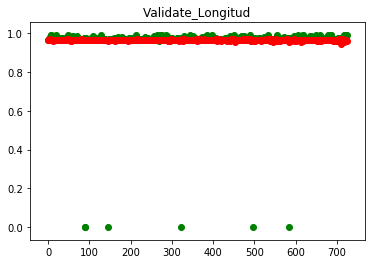

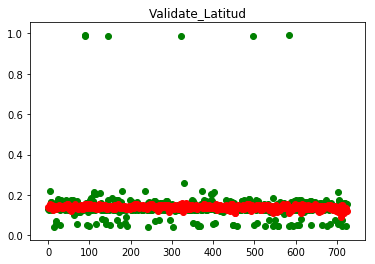

In [15]:
#Gráfico comparativo de los resultados de la red vs los valores de prueba

results=model.predict(x_val)

#Entrega los valores 1 por 1 quitando "Len()"
print(len(results[:,0])) #Columna 1 "Longitud"
print(len(results[:,1])) #Columna 2 "Latitud"

#Permite visualizar que tanto se acerca la predicción con los valores de validación
plt.scatter(range(len(y_val[:, 0])),y_val[:, 0],c='g')
plt.scatter(range(len(results[:, 0])),results[:, 0],c='r')
plt.title('Validate_Longitud')
plt.show()

plt.scatter(range(len(y_val[:, 1])),y_val[:, 1],c='g')
plt.scatter(range(len(results[:, 1])),results[:, 1],c='r')
plt.title('Validate_Latitud')
plt.show()

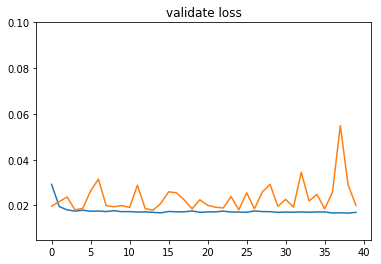

In [16]:
#Permite graficar la pérdida LOSS tanto del conjunto de ENTENAMIENTO(azul)  como de VALIDACION(naranja)

plt.ylim(0.005, 0.1)
plt.plot(history.history['loss'])
plt.title('loss')
plt.plot(history.history['val_loss'])
plt.title('validate loss')
plt.show()

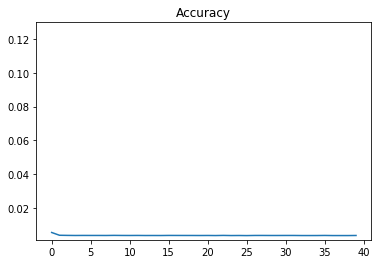

In [17]:
plt.ylim(0.001, 0.13)
plt.title('Accuracy')
plt.plot(history.history['mse'])
plt.show()

In [18]:
#Compara resultados con la predicción y obtenemos diferencia que hay entre el dato real y el predicho

compara_Latitud = pd.DataFrame(np.array([y_val[:, 1], [x[1] for x in results]])).transpose()
compara_Latitud

inverted_Latitud = scaler.inverse_transform(compara_Latitud.values)

compara_Lat = pd.DataFrame(inverted_Latitud)
compara_Lat.columns = ['real', 'prediccion']
compara_Lat['diferencia'] = compara_Lat['real'] - compara_Lat['prediccion']
compara_Lat.head(4)

,real,prediccion,diferencia
0,-33.030678,-32.955326,-0.075352
1,-33.054306,-32.955986,-0.098320
2,-32.980659,-32.954803,-0.025856
3,-33.030792,-33.003448,-0.027344


In [19]:
#Compara resultados con la predicción y obtenemos diferencia que hay entre el dato real y el predicho
#Al invertir los datos a origianles, hay problemas con "Longitud", ya que devuelve datos nada que ver.
#Como se logra ver, al invertir los datos de "LongitudN" son numeros cercanaos al -27 y debería rondar el -72

compara_Longitud = pd.DataFrame(np.array([y_val[:, 0], [x[0] for x in results]])).transpose()
compara_Longitud

inverted_Longitud = scaler.inverse_transform(compara_Longitud.values)

compara_Lon = pd.DataFrame(inverted_Longitud)
compara_Lon.columns = ['real', 'prediccion']
compara_Lon['diferencia'] = compara_Lon['real'] - compara_Lon['prediccion']
compara_Lon.head(4)

,real,prediccion,diferencia
0,-27.315313,-27.316580,0.001266
1,-27.292843,-27.319242,0.026400
2,-27.309879,-27.310841,0.000961
3,-27.300362,-27.312843,0.012482


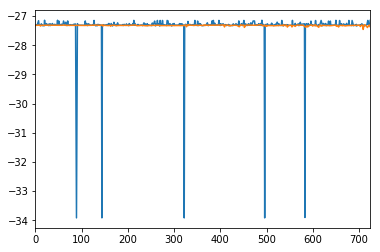

In [20]:
#Gráfico de los resultados de la predicción versus los datos reales
#de variable "Longitud del delito"

compara_Lon['real'].plot() #Color azul
compara_Lon['prediccion'].plot() #Color naranjo

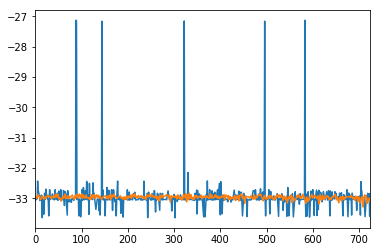

In [21]:
#Gráfico de los resultados de la predicción versus los datos reales
#de variable "Latitud del delito"


compara_Lat['real'].plot() #Color azul
compara_Lat['prediccion'].plot() #Color naranjo